To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee looking for a new job ( 0 or 1)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading data
df = pd.read_csv('Zeta_Analytics Dataset.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

### Data Preprocessing

In [4]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Number of columns with nans: 8


In [5]:
cat_miss_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline','company_size', 'company_type']

In [6]:
for col in cat_miss_cols:
    print(df[col].unique())

['Male' nan 'Female' 'Other']
['no_enrollment' 'Full time course' 'Part time course' nan]
['Graduate' 'Masters' 'High School' 'Phd' nan 'Primary School']
['STEM' 'Other' 'No Major' nan 'Business Degree' 'Arts' 'Humanities']
['100-500' '<10' '50-99' nan '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
['Pvt Ltd' 'Funded Startup' 'Public Sector' nan 'Early Stage Startup'
 'NGO' 'Other']


In [7]:
df[cat_miss_cols] = df[cat_miss_cols].fillna('NA')

In [8]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['experience', 'last_new_job']
Number of columns with nans: 2


In [9]:
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' nan '20']
['1' '2' '3' '>4' 'never' '4' nan]


In [10]:
for column in num_miss_cols:
    # This will replace any '>' or '<' with an empty string
    df[column] = df[column].astype(str).str.replace('>', '').astype(str).str.replace('<', '')
    df[column] = df[column].astype(str).str.replace('never', '0')

In [11]:
for col in num_miss_cols:
    df[col] = pd.to_numeric(df[col].replace('nan', np.NaN))

For these 2 columns experience and last job, the idea is to fill them using a median value since they are key features and replacing them with zeroes may impact the model performance. We will do this with median from train data, after splitting the dataset, to prevent data leakage. 

In [12]:
cat_cols = df.select_dtypes(include='O').columns
cat_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [13]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

city
123
gender
4
relevent_experience
2
enrolled_university
4
education_level
6
major_discipline
7
company_size
9
company_type
7


In these columns, thec column "City" has too many categories, which may not add any value as such to the models training. We will be dropping it. You may try to see the performnace by using this columns as well. Also the column "Enrollee_id" is an ID column, that too can be dropped.

In [14]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
cat_cols = df.select_dtypes(include='O').columns


In [15]:
for col in cat_cols:
    print(col)
    print(df[col].unique())

gender
['Male' 'NA' 'Female' 'Other']
relevent_experience
['Has relevent experience' 'No relevent experience']
enrolled_university
['no_enrollment' 'Full time course' 'Part time course' 'NA']
education_level
['Graduate' 'Masters' 'High School' 'Phd' 'NA' 'Primary School']
major_discipline
['STEM' 'Other' 'No Major' 'NA' 'Business Degree' 'Arts' 'Humanities']
company_size
['100-500' '<10' '50-99' 'NA' '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
company_type
['Pvt Ltd' 'Funded Startup' 'Public Sector' 'NA' 'Early Stage Startup'
 'NGO' 'Other']


Further, over here columns like  "education level" and "company size" have a clear order, and will be transformed using an ordinal encoder, with NA in between. Others will be transformed using One hot encoder. 
An ordinal encoder is a technique used to convert categorical data into integer codes, ranging from 0 to n-1, where n is the number of unique categories for the feature. Unlike one-hot encoding, which creates a new binary column for each category, ordinal encoding maintains a single column and assigns a unique integer to each category in an order.

In [16]:
from sklearn.preprocessing import  OrdinalEncoder

In [17]:
oc = OrdinalEncoder(
    categories= [['Primary School', 'High School', 'NA','Graduate', 'Masters', 'Phd' ]])
df[['education_level']] = oc.fit_transform(df[['education_level']])
oc.categories_

[array(['Primary School', 'High School', 'NA', 'Graduate', 'Masters',
        'Phd'], dtype=object)]

In [18]:
oc2 = OrdinalEncoder(
    categories= [[ '<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999', '5000-9999', '10000+']])
df[['company_size']] = oc2.fit_transform(df[['company_size']])
oc2.categories_

[array(['<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999',
        '5000-9999', '10000+'], dtype=object)]

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_NA,gender_Other,...,major_discipline_NA,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NA,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.689,3.0,3.0,3.0,1.0,106,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.923,3.0,14.0,0.0,1.0,69,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.910,3.0,6.0,2.0,2.0,4,0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.666,3.0,14.0,2.0,1.0,26,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.887,4.0,8.0,5.0,2.0,88,1,False,True,False,...,False,False,False,True,False,True,False,False,False,False


### Train and Test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
# test_size of 0.2 means train_size is 80% and test_size is 20$
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
exp_median = X_train['experience'].median()
print(exp_median)

X_train.fillna({'experience': exp_median}, inplace=True)
X_test.fillna({'experience': exp_median}, inplace=True)

lnj_median = X_train['last_new_job'].median()
print(lnj_median)

X_train.fillna({'last_new_job': lnj_median}, inplace=True)
X_test.fillna({'last_new_job': lnj_median}, inplace=True)


9.0
1.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Normalize data by scaling the train and test datasets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values


In [25]:
df.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

The dataset is imbalanced. So we can use a metric like auc score as the metric for this problem.

### Train neural network

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [28]:
# Encapsulate out dataset as a class, which inherits from the torch Dataset class
class JobChangeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [29]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        return x


In [30]:
import torch
# Convert numpy to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [31]:
# Training and Evaluation Loop
def train_and_evaluate_model(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor, y_train_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average
        
        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode


        
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(y_train_tensor, model(X_train_tensor))
            test_auc = roc_auc_score(y_test_tensor, model(X_test_tensor))
        
        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(epochs),train_loss_list, label = 'train')
    plt.plot(range(epochs),test_loss_list, label = 'test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.show()

Epoch 10/100,Train Loss: 0.3732, Test Loss: 0.3832, Train Auc: 0.6521, Test Auc: 0.6435
Epoch 20/100,Train Loss: 0.3704, Test Loss: 0.3816, Train Auc: 0.6619, Test Auc: 0.6495
Epoch 30/100,Train Loss: 0.3688, Test Loss: 0.3822, Train Auc: 0.6680, Test Auc: 0.6497
Epoch 40/100,Train Loss: 0.3676, Test Loss: 0.3820, Train Auc: 0.6737, Test Auc: 0.6506
Epoch 50/100,Train Loss: 0.3657, Test Loss: 0.3810, Train Auc: 0.6809, Test Auc: 0.6539
Epoch 60/100,Train Loss: 0.3639, Test Loss: 0.3846, Train Auc: 0.6869, Test Auc: 0.6515
Epoch 70/100,Train Loss: 0.3622, Test Loss: 0.3828, Train Auc: 0.6955, Test Auc: 0.6500
Epoch 80/100,Train Loss: 0.3597, Test Loss: 0.3839, Train Auc: 0.7002, Test Auc: 0.6522
Epoch 90/100,Train Loss: 0.3576, Test Loss: 0.3860, Train Auc: 0.7134, Test Auc: 0.6452
Epoch 100/100,Train Loss: 0.3551, Test Loss: 0.3878, Train Auc: 0.7242, Test Auc: 0.6417


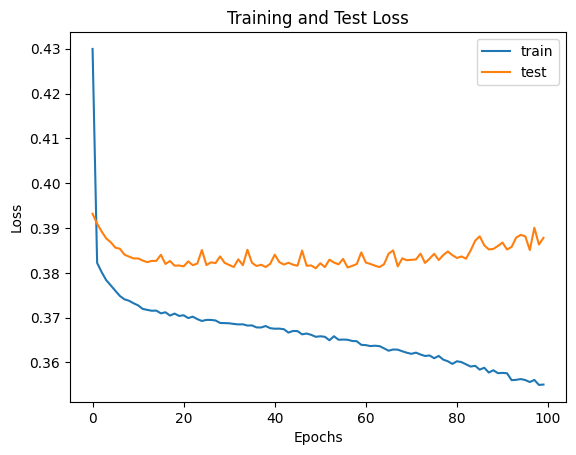

In [32]:
# We have to create a new model class here due the pass-by-reference feature of python functions
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

Notice how the score does not improve significantly on test set after 10 epochs, but keeps on increasing on the train set. The model is clearly overfitting and noticeably the test loss on the epochs is also increasing gradually after 40 epochs. Moreover, there were certain epochs earlier in the training where the score was slightly better on the test set, but then decreased marginally. 

Epoch 10/100,Train Loss: 0.3651, Test Loss: 0.3861, Train Auc: 0.6911, Test Auc: 0.6471
Epoch 20/100,Train Loss: 0.3521, Test Loss: 0.3944, Train Auc: 0.7332, Test Auc: 0.6174
Epoch 30/100,Train Loss: 0.3368, Test Loss: 0.4152, Train Auc: 0.7573, Test Auc: 0.6178
Epoch 40/100,Train Loss: 0.3201, Test Loss: 0.4483, Train Auc: 0.7900, Test Auc: 0.5989
Epoch 50/100,Train Loss: 0.3058, Test Loss: 0.4888, Train Auc: 0.8171, Test Auc: 0.5893
Epoch 60/100,Train Loss: 0.2852, Test Loss: 0.5557, Train Auc: 0.8460, Test Auc: 0.5759
Epoch 70/100,Train Loss: 0.2679, Test Loss: 0.6324, Train Auc: 0.8650, Test Auc: 0.5560
Epoch 80/100,Train Loss: 0.2552, Test Loss: 0.7091, Train Auc: 0.8834, Test Auc: 0.5593
Epoch 90/100,Train Loss: 0.2400, Test Loss: 0.9072, Train Auc: 0.9008, Test Auc: 0.5544
Epoch 100/100,Train Loss: 0.2217, Test Loss: 1.0269, Train Auc: 0.9172, Test Auc: 0.5324


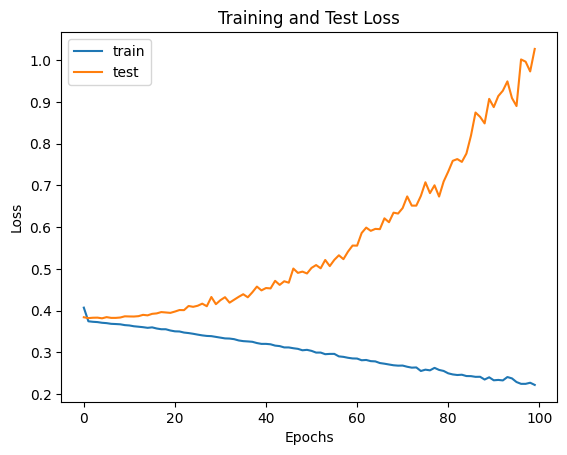

In [33]:
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

As you can see, the model is even more  overfitting as the number of epochs are increasing. The test loss is increasing exponentially after 40 epochs.  Deep Neural networks often get into these kind of problems.

### Leaky ReLU

In [34]:
class BinaryClassifierLeakyReLU(nn.Module):
    def __init__(self):
        super(BinaryClassifierLeakyReLU, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.layer1(x), negative_slope=0.01)  # Using Leaky ReLU
        x = F.leaky_relu(self.layer2(x), negative_slope=0.01)  # Using Leaky ReLU
        x = F.leaky_relu(self.layer3(x), negative_slope=0.01)  # Using Leaky ReLU
        x = torch.sigmoid(self.layer4(x))  # Using sigmoid for binary classification
        return x


Epoch 10/100,Train Loss: 0.3664, Test Loss: 0.3855, Train Auc: 0.6900, Test Auc: 0.6552
Epoch 20/100,Train Loss: 0.3526, Test Loss: 0.3978, Train Auc: 0.7283, Test Auc: 0.6370
Epoch 30/100,Train Loss: 0.3353, Test Loss: 0.4225, Train Auc: 0.7646, Test Auc: 0.6050
Epoch 40/100,Train Loss: 0.3149, Test Loss: 0.4831, Train Auc: 0.7892, Test Auc: 0.5863
Epoch 50/100,Train Loss: 0.2913, Test Loss: 0.5956, Train Auc: 0.8346, Test Auc: 0.5761
Epoch 60/100,Train Loss: 0.2710, Test Loss: 0.6547, Train Auc: 0.8615, Test Auc: 0.5630
Epoch 70/100,Train Loss: 0.2533, Test Loss: 0.7857, Train Auc: 0.8822, Test Auc: 0.5573
Epoch 80/100,Train Loss: 0.2362, Test Loss: 0.9412, Train Auc: 0.9048, Test Auc: 0.5450
Epoch 90/100,Train Loss: 0.2203, Test Loss: 1.0037, Train Auc: 0.9158, Test Auc: 0.5522
Epoch 100/100,Train Loss: 0.2094, Test Loss: 1.1902, Train Auc: 0.9268, Test Auc: 0.5511


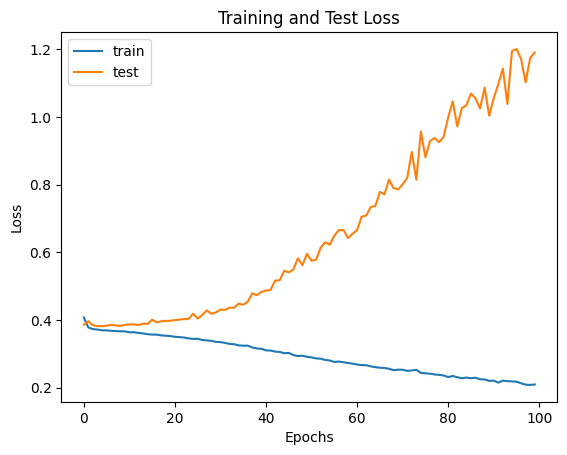

In [35]:
model = BinaryClassifierLeakyReLU()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

### Batch Normalization

In [36]:
class BinaryClassifierBN(nn.Module):
    def __init__(self):
        super(BinaryClassifierBN, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.layer4(x))
        return x

Epoch 10/100,Train Loss: 0.3533, Test Loss: 0.3893, Train Auc: 0.7408, Test Auc: 0.6442
Epoch 20/100,Train Loss: 0.3214, Test Loss: 0.4239, Train Auc: 0.8123, Test Auc: 0.6149
Epoch 30/100,Train Loss: 0.2795, Test Loss: 0.5201, Train Auc: 0.8569, Test Auc: 0.5795
Epoch 40/100,Train Loss: 0.2434, Test Loss: 0.6697, Train Auc: 0.9137, Test Auc: 0.5614
Epoch 50/100,Train Loss: 0.2078, Test Loss: 0.7818, Train Auc: 0.9314, Test Auc: 0.5476
Epoch 60/100,Train Loss: 0.1941, Test Loss: 0.9977, Train Auc: 0.9491, Test Auc: 0.5498
Epoch 70/100,Train Loss: 0.1643, Test Loss: 1.1418, Train Auc: 0.9563, Test Auc: 0.5531
Epoch 80/100,Train Loss: 0.1478, Test Loss: 1.3117, Train Auc: 0.9721, Test Auc: 0.5295
Epoch 90/100,Train Loss: 0.1432, Test Loss: 1.4311, Train Auc: 0.9722, Test Auc: 0.5340
Epoch 100/100,Train Loss: 0.1364, Test Loss: 1.5933, Train Auc: 0.9759, Test Auc: 0.5307


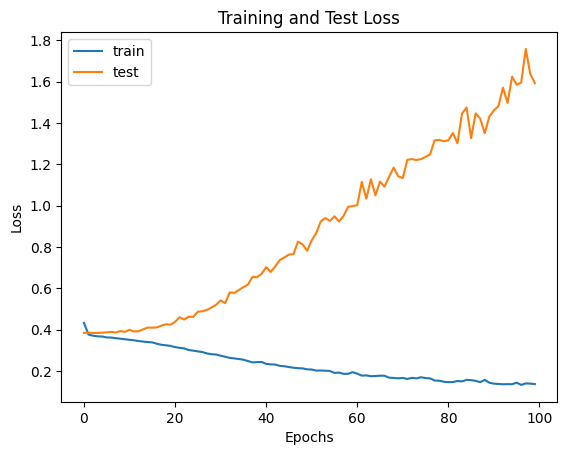

In [37]:
model = BinaryClassifierBN()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

### Dropout for reducing overfitting

In [38]:
class BinaryClassifierDropout(nn.Module):
    def __init__(self):
        super(BinaryClassifierDropout, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = self.dropout2(x)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = self.dropout3(x)
        x = torch.sigmoid(self.layer4(x))
        return x


Epoch 10/100,Train Loss: 0.3582, Test Loss: 0.3873, Train Auc: 0.7248, Test Auc: 0.6462
Epoch 20/100,Train Loss: 0.3354, Test Loss: 0.4024, Train Auc: 0.7894, Test Auc: 0.6217
Epoch 30/100,Train Loss: 0.2945, Test Loss: 0.4695, Train Auc: 0.8595, Test Auc: 0.5905
Epoch 40/100,Train Loss: 0.2475, Test Loss: 0.6105, Train Auc: 0.9027, Test Auc: 0.5626
Epoch 50/100,Train Loss: 0.2122, Test Loss: 0.7845, Train Auc: 0.9352, Test Auc: 0.5398
Epoch 60/100,Train Loss: 0.1865, Test Loss: 0.9785, Train Auc: 0.9529, Test Auc: 0.5280
Epoch 70/100,Train Loss: 0.1700, Test Loss: 1.1366, Train Auc: 0.9589, Test Auc: 0.5325
Epoch 80/100,Train Loss: 0.1500, Test Loss: 1.2884, Train Auc: 0.9679, Test Auc: 0.5345
Epoch 90/100,Train Loss: 0.1335, Test Loss: 1.4594, Train Auc: 0.9746, Test Auc: 0.5275
Epoch 100/100,Train Loss: 0.1215, Test Loss: 1.4806, Train Auc: 0.9809, Test Auc: 0.5447


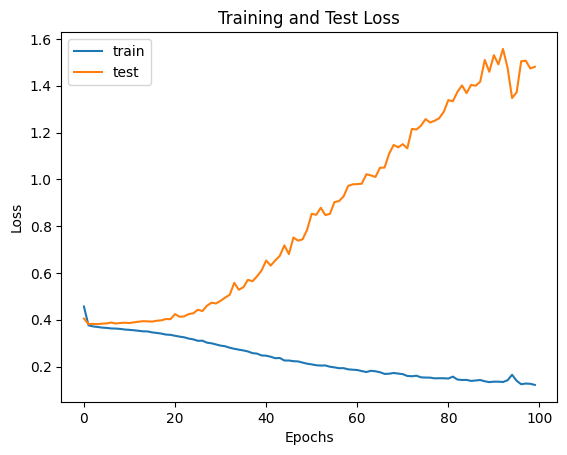

In [39]:
model = BinaryClassifierDropout()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

### L2 regularization to reduce overfitting

In [40]:
class BinaryClassifierL2(nn.Module):
    def __init__(self):
        super(BinaryClassifierL2, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.layer4(x))
        return x

Epoch 10/100,Train Loss: 0.3548, Test Loss: 0.3975, Train Auc: 0.7297, Test Auc: 0.6303
Epoch 20/100,Train Loss: 0.3204, Test Loss: 0.4379, Train Auc: 0.8047, Test Auc: 0.6076
Epoch 30/100,Train Loss: 0.2809, Test Loss: 0.5166, Train Auc: 0.8679, Test Auc: 0.5879
Epoch 40/100,Train Loss: 0.2414, Test Loss: 0.6530, Train Auc: 0.9087, Test Auc: 0.5626
Epoch 50/100,Train Loss: 0.2062, Test Loss: 0.8425, Train Auc: 0.9347, Test Auc: 0.5454
Epoch 60/100,Train Loss: 0.1799, Test Loss: 1.0809, Train Auc: 0.9494, Test Auc: 0.5362
Epoch 70/100,Train Loss: 0.1648, Test Loss: 1.1898, Train Auc: 0.9627, Test Auc: 0.5336
Epoch 80/100,Train Loss: 0.1671, Test Loss: 1.3173, Train Auc: 0.9647, Test Auc: 0.5384
Epoch 90/100,Train Loss: 0.1484, Test Loss: 1.6015, Train Auc: 0.9652, Test Auc: 0.5124
Epoch 100/100,Train Loss: 0.1346, Test Loss: 1.6419, Train Auc: 0.9722, Test Auc: 0.5461


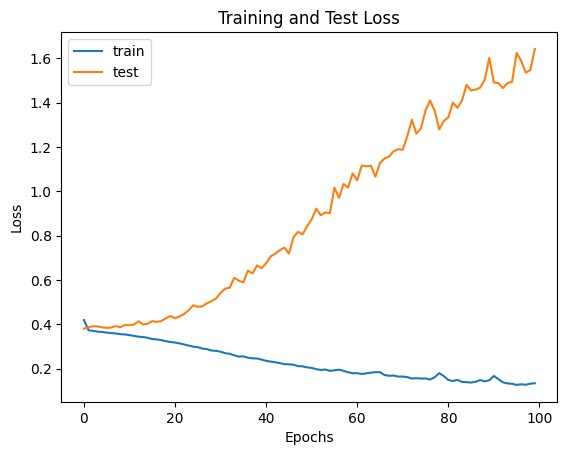

In [41]:
model = BinaryClassifierL2()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

### Early stopping to reduce overfitting

In [42]:
# MANUAL
# Training and Evaluation Loop
def train_and_evaluate_model_es(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    best_val_loss = float('inf')
    patience = 0
    max_patience = 10  # Maximum epochs to wait for improvement

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor, y_train_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # set the model to train mode for each epoch, since we are setting it to eval mode later
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average
        
        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(y_train_tensor, model(X_train_tensor))
            test_auc = roc_auc_score(y_test_tensor, model(X_test_tensor))
        
        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

# Implementing Early stoping
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            patience = 0
            # torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience += 1

        if patience >= max_patience:
            print(f'Early stopped at {epoch+1}')
            break  # Stop training

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(len(train_loss_list)),train_loss_list, label = 'train')
    plt.plot(range(len(train_loss_list)),test_loss_list, label = 'test')
    plt.legend()
    plt.show()
    
    

Epoch 10/100,Train Loss: 0.3778, Test Loss: 0.3845, Train Auc: 0.6736, Test Auc: 0.6476
Epoch 20/100,Train Loss: 0.3750, Test Loss: 0.3824, Train Auc: 0.6843, Test Auc: 0.6536
Epoch 30/100,Train Loss: 0.3679, Test Loss: 0.3825, Train Auc: 0.6940, Test Auc: 0.6517
Epoch 40/100,Train Loss: 0.3688, Test Loss: 0.3822, Train Auc: 0.7021, Test Auc: 0.6522
Early stopped at 44


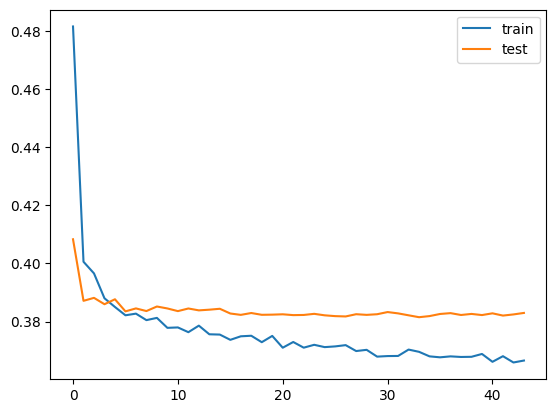

In [43]:
model = BinaryClassifierDropout()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model_es(model, optimizer, epochs=100, print_every=10)

## Hyperparameter Tuning

In [44]:
device = "cpu"

In [45]:
def train_and_evaluate_model_optuna(model, optimizer_optuna, batch_size=128, epochs=25, print_every=5, show_plot=False):
    # model.to(device)  # Move the model to the designated device

    model.train()  # Set model to train mode

    train_loss_list = []
    test_loss_list = []

    # Convert the tensor-based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor.to(device), y_train_tensor.to(device))
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(X_test_tensor.to(device), y_test_tensor.to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train()
        for features, labels in train_loader:
            # features, labels = features.to(device), labels.to(device)  # Move data to the device

            optimizer_optuna.zero_grad()  # Clear the gradients of all optimized variables
            outputs = model(features)  # Pass data through the model
            loss = criterion(outputs.squeeze(), labels)  # Calculate loss
            loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
            optimizer_optuna.step()  # Perform a single optimization step (parameter update)
            train_loss += loss.item()  # Accumulate the training loss
        
        # Calculate the average training loss for the current epoch
        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on the test set
        model.eval()  # Switch model to evaluation mode
        test_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation
            for features, labels in test_loader:
                # features, labels = features.to(device), labels.to(device)  # Move data to the device
                outputs = model(features)
                loss = criterion(outputs.squeeze(), labels)
                test_loss += loss.item()
                
        test_loss /= len(test_loader)
        test_loss_list.append(test_loss)

        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
            # set model to evaluation mode
            model.eval()
            with torch.no_grad():
                train_preds = model(X_train_tensor.to(device)).squeeze()
                test_preds = model(X_test_tensor.to(device)).squeeze()
                train_auc = roc_auc_score(y_train_tensor.cpu(), train_preds.cpu())
                test_auc = roc_auc_score(y_test_tensor.cpu(), test_preds.cpu())

            print(f'Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}')
    if (show_plot):
        plt.plot(range(epochs),train_loss_list, label = 'train')
        plt.plot(range(epochs),test_loss_list, label = 'test')
        plt.legend()
        plt.show()

    # Returning the last epoch AUC values for Optuna optimization
    return train_auc, test_auc  


In [46]:
class BinaryClassifierDropoutOptuna(nn.Module):
    def __init__(self, num_features, num_classes, dropout_rate, num_layers, num_nodes):
        super(BinaryClassifierDropoutOptuna, self).__init__()
        layers = []
        prev_nodes = num_features  # Input size
        
        # Dynamically create layers based on num_layers and num_nodes
        for _ in range(num_layers):
            layers.append(nn.Linear(prev_nodes, num_nodes))
            layers.append(nn.ReLU()) # You could also try Leakt ReLU
            layers.append(nn.Dropout(dropout_rate))
            layers.append(nn.BatchNorm1d(num_nodes))
            prev_nodes = num_nodes  # Update prev_nodes for the next layer
        
        # Output layer
        layers.append(nn.Linear(prev_nodes, num_classes))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.layers(x)
        x = torch.sigmoid(x)  
        return x



In [47]:
def objective(trial):
    # Hyperparameters to be optimized
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5) # trial range will be from 0.1 to 0.5
    num_layers = trial.suggest_int('num_layers', 2, 5)  # Suggesting 1 to 3 layers
    num_nodes = trial.suggest_categorical('num_nodes', [64, 128])  # Nodes per layer options
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True) # trying different learning rates
    
    # Model instantiation
    model = BinaryClassifierDropoutOptuna(num_features=X_train.shape[1], num_classes=1, 
                                    dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Train and evaluate the model
    train_auc, test_auc = train_and_evaluate_model_optuna(model, optimizer, epochs=30, print_every=30)
    
    return test_auc


In the above code the last line specifies to return the test_auc score. This will feed into the optuna library for optimization. This is because our ultimate goal is to maximize the test_auc score. With our ranges dialled in, next let's set the number of combinations we wish to try. We are going to try 50 combinations here. By default optuna.create study uses a TPE sampler which is a bayesian optimisation algorithm.

In [53]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Display the best trial results
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-03-09 09:32:23,029] A new study created in memory with name: no-name-eb11ebde-2137-4eb9-acc5-07c4fd98fc25
[I 2025-03-09 09:32:38,320] Trial 0 finished with value: 0.652984867591425 and parameters: {'dropout_rate': 0.3249913218115399, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.030057720230117477}. Best is trial 0 with value: 0.652984867591425.


Epoch 30/30, Train Loss: 0.3758, Test Loss: 0.4120
Train AUC: 0.6713, Test AUC: 0.6530


[I 2025-03-09 09:32:49,804] Trial 1 finished with value: 0.6437484237074402 and parameters: {'dropout_rate': 0.1457148833744241, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.01100775561461841}. Best is trial 0 with value: 0.652984867591425.


Epoch 30/30, Train Loss: 0.3670, Test Loss: 0.3834
Train AUC: 0.6958, Test AUC: 0.6437


[I 2025-03-09 09:33:01,454] Trial 2 finished with value: 0.6533855611601513 and parameters: {'dropout_rate': 0.21020474817297782, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.03233518758611193}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3738, Test Loss: 0.4083
Train AUC: 0.6732, Test AUC: 0.6534


[I 2025-03-09 09:33:10,299] Trial 3 finished with value: 0.6507118537200505 and parameters: {'dropout_rate': 0.26580973648555173, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.009499383963645257}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3679, Test Loss: 0.3841
Train AUC: 0.6854, Test AUC: 0.6507


[I 2025-03-09 09:33:21,926] Trial 4 finished with value: 0.6370116645649433 and parameters: {'dropout_rate': 0.22311403930499482, 'num_layers': 4, 'num_nodes': 64, 'lr': 4.838276187833565e-05}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.4371, Test Loss: 0.4126
Train AUC: 0.6532, Test AUC: 0.6370


[I 2025-03-09 09:33:30,813] Trial 5 finished with value: 0.6265176544766708 and parameters: {'dropout_rate': 0.4657356711160823, 'num_layers': 2, 'num_nodes': 128, 'lr': 3.623982612436275e-05}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.4564, Test Loss: 0.4251
Train AUC: 0.6553, Test AUC: 0.6265


[I 2025-03-09 09:33:40,048] Trial 6 finished with value: 0.6379861286254729 and parameters: {'dropout_rate': 0.3997266127272502, 'num_layers': 2, 'num_nodes': 128, 'lr': 1.0123462129537628e-05}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.6605, Test Loss: 0.6566
Train AUC: 0.6469, Test AUC: 0.6380


[I 2025-03-09 09:33:50,029] Trial 7 finished with value: 0.6435580075662043 and parameters: {'dropout_rate': 0.45129142009000855, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.00023660789746644952}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3853, Test Loss: 0.3840
Train AUC: 0.6629, Test AUC: 0.6436


[I 2025-03-09 09:34:02,374] Trial 8 finished with value: 0.6184445145018915 and parameters: {'dropout_rate': 0.1311639507855408, 'num_layers': 3, 'num_nodes': 128, 'lr': 1.1020825826178494e-05}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.6166, Test Loss: 0.5791
Train AUC: 0.6593, Test AUC: 0.6184


[I 2025-03-09 09:34:11,798] Trial 9 finished with value: 0.6210066204287515 and parameters: {'dropout_rate': 0.353364300989472, 'num_layers': 2, 'num_nodes': 128, 'lr': 1.76925494773191e-05}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.5666, Test Loss: 0.5625
Train AUC: 0.6508, Test AUC: 0.6210


[I 2025-03-09 09:34:29,859] Trial 10 finished with value: 0.640421185372005 and parameters: {'dropout_rate': 0.20505622383901725, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.08113954767013196}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3896, Test Loss: 0.4386
Train AUC: 0.6567, Test AUC: 0.6404


[I 2025-03-09 09:34:43,316] Trial 11 finished with value: 0.646779949558638 and parameters: {'dropout_rate': 0.3266148169557626, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.05229269216172203}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3781, Test Loss: 0.3902
Train AUC: 0.6723, Test AUC: 0.6468


[I 2025-03-09 09:37:02,825] Trial 12 finished with value: 0.6475605296343001 and parameters: {'dropout_rate': 0.2815195176813851, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.0029413276583001432}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3695, Test Loss: 0.3833
Train AUC: 0.6861, Test AUC: 0.6476


[I 2025-03-09 09:38:12,904] Trial 13 finished with value: 0.6495882723833544 and parameters: {'dropout_rate': 0.2110187542097451, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.015118346285408799}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3689, Test Loss: 0.3864
Train AUC: 0.6899, Test AUC: 0.6496


[I 2025-03-09 09:38:30,523] Trial 14 finished with value: 0.6486021437578814 and parameters: {'dropout_rate': 0.3755710759673524, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.0010360194007469543}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3690, Test Loss: 0.3834
Train AUC: 0.6991, Test AUC: 0.6486


[I 2025-03-09 09:38:40,899] Trial 15 finished with value: 0.6455394073139974 and parameters: {'dropout_rate': 0.2566475608218082, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.03256914906377622}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3742, Test Loss: 0.3863
Train AUC: 0.6679, Test AUC: 0.6455


[I 2025-03-09 09:38:55,206] Trial 16 finished with value: 0.6440860655737705 and parameters: {'dropout_rate': 0.173032718062153, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.004982282605894376}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3663, Test Loss: 0.3840
Train AUC: 0.6956, Test AUC: 0.6441


[I 2025-03-09 09:39:10,252] Trial 17 finished with value: 0.6443795712484237 and parameters: {'dropout_rate': 0.30944483300883535, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.001040891030373079}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3663, Test Loss: 0.3854
Train AUC: 0.7083, Test AUC: 0.6444


[I 2025-03-09 09:39:22,421] Trial 18 finished with value: 0.6402377049180328 and parameters: {'dropout_rate': 0.11039898424656733, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.024992660333023504}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3698, Test Loss: 0.5750
Train AUC: 0.6909, Test AUC: 0.6402


[I 2025-03-09 09:39:34,081] Trial 19 finished with value: 0.6384665825977303 and parameters: {'dropout_rate': 0.4184097274715536, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.09536428316192957}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3907, Test Loss: 0.4586
Train AUC: 0.6560, Test AUC: 0.6385


[I 2025-03-09 09:39:47,042] Trial 20 finished with value: 0.6468789407313997 and parameters: {'dropout_rate': 0.33318260595975513, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.002891932850550815}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3667, Test Loss: 0.3832
Train AUC: 0.7021, Test AUC: 0.6469


[I 2025-03-09 09:39:56,695] Trial 21 finished with value: 0.6480037831021437 and parameters: {'dropout_rate': 0.25085037294368917, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.007552703872816128}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3675, Test Loss: 0.3831
Train AUC: 0.6895, Test AUC: 0.6480


[I 2025-03-09 09:40:06,358] Trial 22 finished with value: 0.6507859394703657 and parameters: {'dropout_rate': 0.26597222961783534, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.023994332234989164}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3725, Test Loss: 0.3835
Train AUC: 0.6746, Test AUC: 0.6508


[I 2025-03-09 09:40:16,149] Trial 23 finished with value: 0.6467244640605296 and parameters: {'dropout_rate': 0.18229352344989436, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.03071900730778353}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3734, Test Loss: 0.3913
Train AUC: 0.6805, Test AUC: 0.6467


[I 2025-03-09 09:40:28,985] Trial 24 finished with value: 0.6339268600252207 and parameters: {'dropout_rate': 0.22947216067650794, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.0002411830780238765}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3694, Test Loss: 0.3883
Train AUC: 0.7146, Test AUC: 0.6339


[I 2025-03-09 09:40:44,704] Trial 25 finished with value: 0.6451664564943254 and parameters: {'dropout_rate': 0.2904727648273217, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.01853356314153499}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3718, Test Loss: 0.4525
Train AUC: 0.6773, Test AUC: 0.6452


[I 2025-03-09 09:40:55,086] Trial 26 finished with value: 0.6496172761664565 and parameters: {'dropout_rate': 0.30659835741401514, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.04818714094167078}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3778, Test Loss: 0.3837
Train AUC: 0.6691, Test AUC: 0.6496


[I 2025-03-09 09:41:04,993] Trial 27 finished with value: 0.6528950189155108 and parameters: {'dropout_rate': 0.3559766738908651, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.003556486981536446}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3678, Test Loss: 0.3859
Train AUC: 0.6934, Test AUC: 0.6529


[I 2025-03-09 09:41:19,609] Trial 28 finished with value: 0.64381210592686 and parameters: {'dropout_rate': 0.36920744140629513, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.002064623140290561}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3696, Test Loss: 0.3842
Train AUC: 0.6812, Test AUC: 0.6438


[I 2025-03-09 09:41:32,413] Trial 29 finished with value: 0.6477446406052965 and parameters: {'dropout_rate': 0.4344182142468559, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.00035652276086614175}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3800, Test Loss: 0.3831
Train AUC: 0.6580, Test AUC: 0.6477


[I 2025-03-09 09:41:45,834] Trial 30 finished with value: 0.6446661412358133 and parameters: {'dropout_rate': 0.3917880672145883, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.007426548902499807}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3715, Test Loss: 0.3838
Train AUC: 0.6815, Test AUC: 0.6447


[I 2025-03-09 09:41:55,719] Trial 31 finished with value: 0.6487068095838588 and parameters: {'dropout_rate': 0.3361793281211771, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.0145920689571235}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3707, Test Loss: 0.3846
Train AUC: 0.6829, Test AUC: 0.6487


[I 2025-03-09 09:42:05,638] Trial 32 finished with value: 0.6501440731399748 and parameters: {'dropout_rate': 0.26967133964779383, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.004727037634018865}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3670, Test Loss: 0.4119
Train AUC: 0.6990, Test AUC: 0.6501


[I 2025-03-09 09:42:15,616] Trial 33 finished with value: 0.649624842370744 and parameters: {'dropout_rate': 0.16408448023753275, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.012547904337797915}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3677, Test Loss: 0.3851
Train AUC: 0.6919, Test AUC: 0.6496


[I 2025-03-09 09:42:25,406] Trial 34 finished with value: 0.6427020807061792 and parameters: {'dropout_rate': 0.24341018705405237, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.05545717363186743}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3779, Test Loss: 0.3862
Train AUC: 0.6596, Test AUC: 0.6427


[I 2025-03-09 09:42:35,241] Trial 35 finished with value: 0.6496733921815888 and parameters: {'dropout_rate': 0.3089871195993513, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.0223180320275272}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3722, Test Loss: 0.3838
Train AUC: 0.6735, Test AUC: 0.6497


[I 2025-03-09 09:42:45,294] Trial 36 finished with value: 0.6490889029003784 and parameters: {'dropout_rate': 0.1968664989613015, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.009669413480183233}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3672, Test Loss: 0.3844
Train AUC: 0.6965, Test AUC: 0.6491


[I 2025-03-09 09:42:58,671] Trial 37 finished with value: 0.6373111601513242 and parameters: {'dropout_rate': 0.22969097886996287, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.00010031895647023708}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3781, Test Loss: 0.3894
Train AUC: 0.7040, Test AUC: 0.6373


[I 2025-03-09 09:43:11,856] Trial 38 finished with value: 0.6502351828499369 and parameters: {'dropout_rate': 0.494364125846337, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.00152382677571746}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3732, Test Loss: 0.3835
Train AUC: 0.6732, Test AUC: 0.6502


[I 2025-03-09 09:43:36,333] Trial 39 finished with value: 0.6449691046658259 and parameters: {'dropout_rate': 0.3533813629243686, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.005253460587855009}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3690, Test Loss: 0.3864
Train AUC: 0.6885, Test AUC: 0.6450


[I 2025-03-09 09:43:55,868] Trial 40 finished with value: 0.6477730138713744 and parameters: {'dropout_rate': 0.27260020373867705, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.03825046349828011}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3763, Test Loss: 0.4393
Train AUC: 0.6735, Test AUC: 0.6478


[I 2025-03-09 09:44:12,475] Trial 41 finished with value: 0.652001261034048 and parameters: {'dropout_rate': 0.14760703827799154, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.009558802890622152}. Best is trial 2 with value: 0.6533855611601513.


Epoch 30/30, Train Loss: 0.3671, Test Loss: 0.4359
Train AUC: 0.6916, Test AUC: 0.6520


[I 2025-03-09 09:44:27,354] Trial 42 finished with value: 0.6563228247162674 and parameters: {'dropout_rate': 0.14331808138632746, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.010065314017315492}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3662, Test Loss: 0.3869
Train AUC: 0.6954, Test AUC: 0.6563


[I 2025-03-09 09:44:40,513] Trial 43 finished with value: 0.6245958385876419 and parameters: {'dropout_rate': 0.13919741479506378, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.0030810686912263593}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3577, Test Loss: 0.3945
Train AUC: 0.7305, Test AUC: 0.6246


[I 2025-03-09 09:44:53,700] Trial 44 finished with value: 0.6442862547288777 and parameters: {'dropout_rate': 0.10312119471605953, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.009985591242382135}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3655, Test Loss: 0.4483
Train AUC: 0.6958, Test AUC: 0.6443


[I 2025-03-09 09:45:04,703] Trial 45 finished with value: 0.6478994325346785 and parameters: {'dropout_rate': 0.15599656450053093, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.06545540425399445}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3776, Test Loss: 0.4225
Train AUC: 0.6668, Test AUC: 0.6479


[I 2025-03-09 09:45:18,056] Trial 46 finished with value: 0.6330624211853719 and parameters: {'dropout_rate': 0.12006198864467532, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.005628532022755961}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3614, Test Loss: 0.3927
Train AUC: 0.7166, Test AUC: 0.6331


[I 2025-03-09 09:45:35,813] Trial 47 finished with value: 0.6233272383354351 and parameters: {'dropout_rate': 0.14870034675035193, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.0006370542628254982}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3530, Test Loss: 0.4010
Train AUC: 0.7581, Test AUC: 0.6233


[I 2025-03-09 09:45:49,202] Trial 48 finished with value: 0.6496576292559899 and parameters: {'dropout_rate': 0.12824716190782132, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.014844451692991303}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3691, Test Loss: 0.4367
Train AUC: 0.6855, Test AUC: 0.6497


[I 2025-03-09 09:46:08,674] Trial 49 finished with value: 0.6477957124842371 and parameters: {'dropout_rate': 0.20391862781490808, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.003355344651538099}. Best is trial 42 with value: 0.6563228247162674.


Epoch 30/30, Train Loss: 0.3656, Test Loss: 0.3842
Train AUC: 0.7084, Test AUC: 0.6478
Best trial:
  Value:  0.6563228247162674
  Params: 
    dropout_rate: 0.14331808138632746
    num_layers: 2
    num_nodes: 128
    lr: 0.010065314017315492


We've got our best model parameters. Let's now use these hyperparameters suggested by Optuna to build our model with early stopping. 

In [54]:
dropout_rate = trial.params['dropout_rate']
num_layers = trial.params['num_layers']
num_nodes = trial.params['num_nodes']
lr = trial.params['lr']


num_features = X_train.shape[1]  
num_classes = 1  # For binary classification

# Initialize model with best hyperparameters
model = BinaryClassifierDropoutOptuna(num_features=num_features, num_classes=num_classes, 
                                 dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes).to(device)


Epoch 10/100,Train Loss: 0.3712, Test Loss: 0.3834, Train Auc: 0.6853, Test Auc: 0.6487
Early stopped at 17


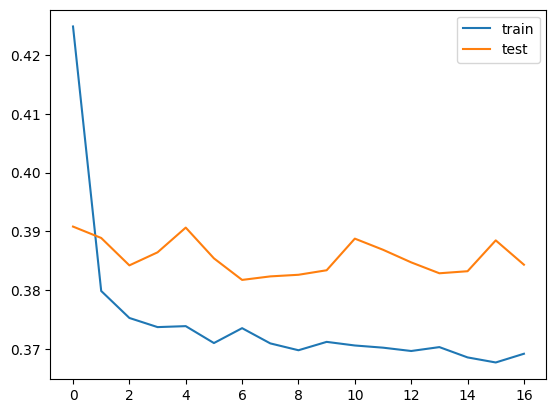

In [55]:
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Train using optimizer_sgd
train_and_evaluate_model_es(model, optimizer, epochs=100, print_every=10)

# Save and Deploy Model

In [56]:
# Option 1
torch.save(model.state_dict(), 'model.pth')

In [57]:
# Option 2: save complete model
torch.save(model, 'model.pt')